In [1]:
# A library that provides a set of high level functions and features for performing data analysis and manipulation.
# It enables you to process, analyze, manipulate, and visualize large amounts of data quickly and efficiently.
import numpy as np

# As an open-source software library built on top of Python specifically for data manipulation and analysis, 
# Pandas offers data structure and operations for  powerful, flexible, and easy-to-use data analysis and manipulation.
import pandas as pd 

# Imports all the functions from matplotlib. pyplot , numpy , numpy. fft , numpy. linalg , and numpy. random , 
# and some additional functions into the global namespace.
from pylab import *

# Cartopy supports several map projections. 
# CRS class is the very core of cartopy, all coordinate reference systems in cartopy have CRS as a parent class
import cartopy.crs as ccrs

# A Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.
import cartopy.feature as cfeature

# Xarray includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.
import xarray as xr

In [2]:
# The data directory location
datadir = '../data/' 

In [3]:
print (datadir)

../data/


In [4]:
# Choosing the file
datafile = datadir+'NNATL12-MP423c_y1995.1d_gridTsurf.nc'

In [5]:
# Reading and writing files with Xarray, add new variable about salinity
vosaldat = xr.open_dataset(datafile)

In [6]:
# We can see the data inside this variable
vosaldat

<xarray.Dataset>
Dimensions:               (y: 402, x: 934, deptht: 75, axis_nbounds: 2,
                           time_counter: 365)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1995-01-01T12:00:00 ....
    time_instant          (time_counter) datetime64[ns] ...
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/19)
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    time_instant_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sosstsst              (time_counter, y, x) float32 ...
    sosaline              (time_counter, y, x) float32 ...
    ...                    ...
    mldkz5                (time_counter, y, x) float32 ...
    mldr10_1              (time_counter, y, x) float32 ...
    mldr10_1dcy           (time_counter, y, x) float32 ...
    sbt                   (time_counter, y, x) float32 ...
    heatc                 (time_counter, y, x) float32 ...
    saltc                 (time_counter, y, x) float32 ...
Attributes:
    description:               ocean T grid variables
    title:                     ocean T grid variables
    Conventions:               CF-1.6
    uuid:                      0d35d9e5-ff29-4895-90cb-d2bd50911ff9
    start_date:                19920101
    output_frequency:          1d
    CONFIG:                    NNATL12
    CASE:                      MP4.23
    history:                   Wed May  3 22:29:49 2023: ncrcat -O NNATL12-MP...
    NCO:                       "4.6.3"
    nco_openmp_thread_number:  1

In [9]:
# Use salinity characteristics, except depth
vosal = vosaldat.vosaline.values[:,0,:,:]

In [10]:
depth = vosaldat.deptht.values
tim = vosaldat.time_counter.values
lat = vosaldat.nav_lat.values
lon = vosaldat.nav_lon.values

In [11]:
# Returns a tuple with each index having the number of corresponding elements
vosal.shape

(365, 402, 934)

In [12]:
# Annual data in point with coordinates 333;500
vosal[:,333,500]

array([33.432766, 33.600395, 33.56173 , 33.57773 , 33.58103 , 33.624634,
       33.64869 , 33.63169 , 33.61524 , 33.60116 , 33.586052, 33.56316 ,
       33.53658 , 33.54754 , 33.59026 , 33.68332 , 33.687714, 33.688644,
       33.720036, 33.72028 , 33.59097 , 33.52437 , 33.527718, 33.569054,
       33.453182, 33.553562, 33.53761 , 33.419262, 33.43054 , 33.497047,
       33.47204 , 33.472305, 33.483387, 33.485977, 33.48484 , 33.482224,
       33.47084 , 33.480934, 33.53432 , 33.581593, 33.609966, 33.62725 ,
       33.630646, 33.61684 , 33.60539 , 33.59624 , 33.58466 , 33.577667,
       33.57634 , 33.570812, 33.57057 , 33.58711 , 33.63907 , 33.679077,
       33.708035, 33.72817 , 33.73307 , 33.713127, 33.705284, 33.754604,
       33.80021 , 33.824844, 33.81968 , 33.810337, 33.821117, 33.788887,
       33.79511 , 33.80338 , 33.704052, 33.681553, 33.67897 , 33.679993,
       33.693207, 33.719135, 33.709026, 33.712193, 33.712547, 33.699272,
       33.714214, 33.703163, 33.701935, 33.70819 , 

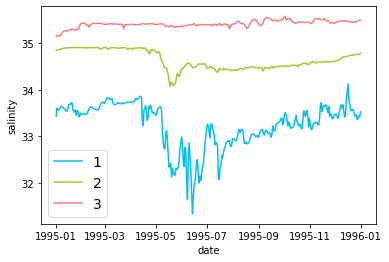

In [19]:
# A collection of functions that make matplotlib work like MATLAB. 
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
plt.plot(tim, vosal[:,333,500], c='deepskyblue')
plt.plot(tim, vosal[:,280,200], c='yellowgreen')
plt.plot(tim, vosal[:,52,620], c='lightcoral')
plt.xlabel('date')
plt.ylabel('salinity')
plt.legend(['1', '2', '3'], fontsize=14)

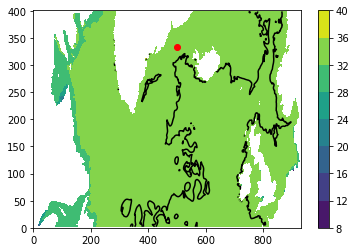

In [15]:
# Draw contour lines and color levels, date - January 23
im1 = plt.contourf(vosal[23,:,:])
im2 = plt.contour(vosal[23,:,:],levels=[35],colors='k')
plt.colorbar(im1)

# Add new point
plt.scatter(500,333,c='r')

In [16]:
# Function generates the sequence of numbers starting from the given start integer to the stop integer. It shows depth
for i in range (len(depth)):
    print (i, depth[i], ' m')

0 0.50576  m
1 1.5558553  m
2 2.6676817  m
3 3.8562799  m
4 5.1403613  m
5 6.5430336  m
6 8.092519  m
7 9.82275  m
8 11.77368  m
9 13.991038  m
10 16.525322  m
11 19.429802  m
12 22.757616  m
13 26.5583  m
14 30.874561  m
15 35.740204  m
16 41.180023  m
17 47.211895  m
18 53.850636  m
19 61.11284  m
20 69.02168  m
21 77.61116  m
22 86.92943  m
23 97.04131  m
24 108.03028  m
25 120.0  m
26 133.07582  m
27 147.40625  m
28 163.16446  m
29 180.54993  m
30 199.78996  m
31 221.14117  m
32 244.89062  m
33 271.35638  m
34 300.8875  m
35 333.86282  m
36 370.68848  m
37 411.79385  m
38 457.6256  m
39 508.6399  m
40 565.2923  m
41 628.026  m
42 697.25867  m
43 773.3683  m
44 856.67896  m
45 947.4479  m
46 1045.8542  m
47 1151.9912  m
48 1265.8615  m
49 1387.377  m
50 1516.3636  m
51 1652.5685  m
52 1795.6708  m
53 1945.2955  m
54 2101.0266  m
55 2262.4216  m
56 2429.0251  m
57 2600.3804  m
58 2776.0393  m
59 2955.5703  m
60 3138.565  m
61 3324.6409  m
62 3513.4456  m
63 3704.6567  m
64 3897.982  

Text(0.5, 1.0, 'Sea surface salinity in the North Atlantic Ocean, (depth - 97.04131 m), January 23, 1995')

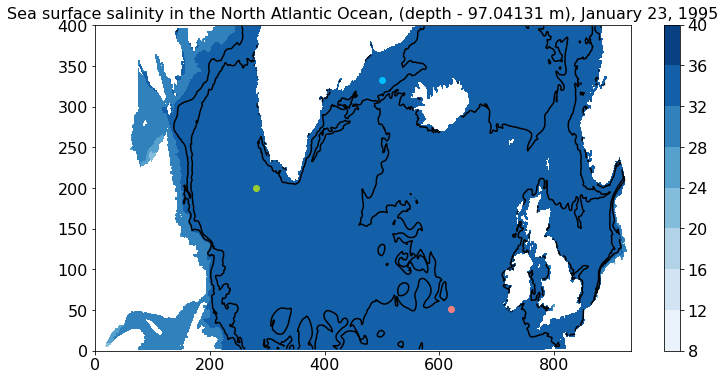

In [20]:
# Size of the figure
plt.figure(figsize = (12,6))

# Draw contour lines and filled contours
im1 = plt.contourf(vosal[23,:,:], cmap = 'Blues')
im2 = plt.contour(vosal[23,:,:],levels=[33, 34, 35],colors='k')

# Add colorbar and points
cb = plt.colorbar(im1)
plt.scatter(500,333, c='deepskyblue')
plt.scatter(280, 200, c='yellowgreen')
plt.scatter(620, 52, c='lightcoral')

# Change tick label font size and add the title
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb.ax.tick_params(labelsize=16)
plt.title('Sea surface salinity in the North Atlantic Ocean, (depth - 97.04131 m), January 23, 1995', fontsize=16)

In [32]:
# We can easily define a function to create a Basemap figure with the mercator projection
def make_cartopy(projection=ccrs.Mercator(central_longitude=-30.0, min_latitude=47, max_latitude=71, globe=None,\
                                          latitude_true_scale=60), figsize=(15, 15), resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    ax.set_extent([-72, 14, 47, 71], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}
    ax.add_feature(cfeature.LAND, facecolor='0.75',edgecolor='black',zorder=2.4)
    return fig, ax

In [33]:
def plot_map(lon,lat, var,name, clmp, tim,varname,vmin, vmax,casename):
    fig,ax = make_cartopy()
    xx, yy = (lon,lat)
    im1 = ax.contourf(xx,yy,var,levels=np.arange(25,40,1),vmin=vmin, vmax=vmax,shading='flat',cmap=clmp,transform=ccrs.PlateCarree())
    cb = plt.colorbar(im1,orientation='horizontal',shrink=0.8,pad=0.05)
    cb.ax.tick_params(labelsize=20)
    plt.title(name, fontsize=20)
    plt.gcf().text(0.83,0.2,tim, fontsize=20)
    plt.savefig(casename+'_'+varname+'.png',bbox_inches='tight', format='png', dpi=200)
      
# Starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures
    plt.show()

# Is used to clear the current axes
    plt.cla()
    
# Clear the entire current figure. It even clears the subplot
    plt.clf()
    
# Close the window of the plot. By default, it closes the current window
    plt.close()

/storage/kubrick/zhmiro/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'shading'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


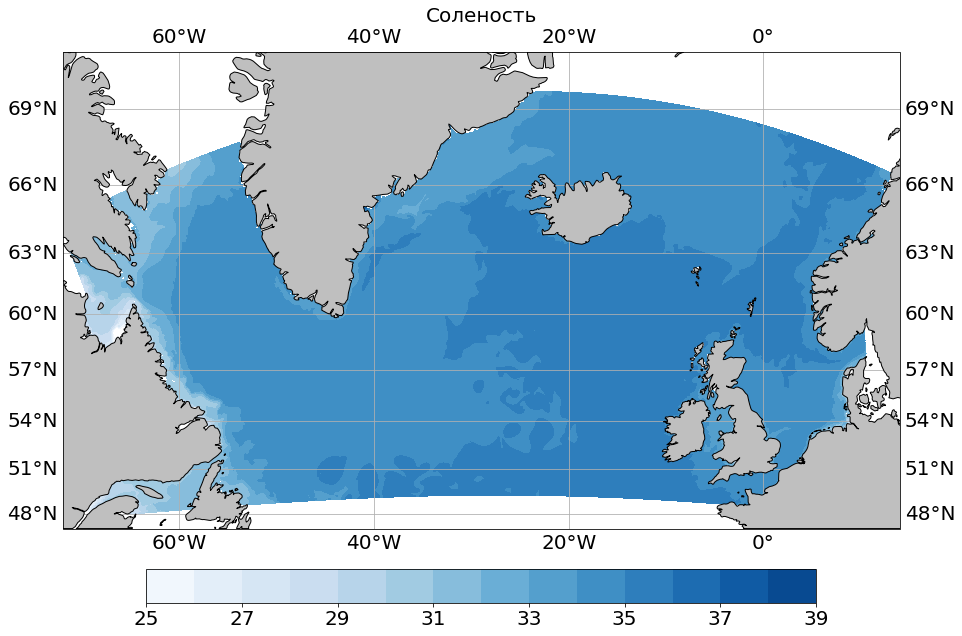

In [34]:
# Draw the map
plot_map(lon, lat, vosal[23], "Соленость", "Blues","","vosal", 25, 40, "0m")

0 1995-01-01T12:00:00.000000000


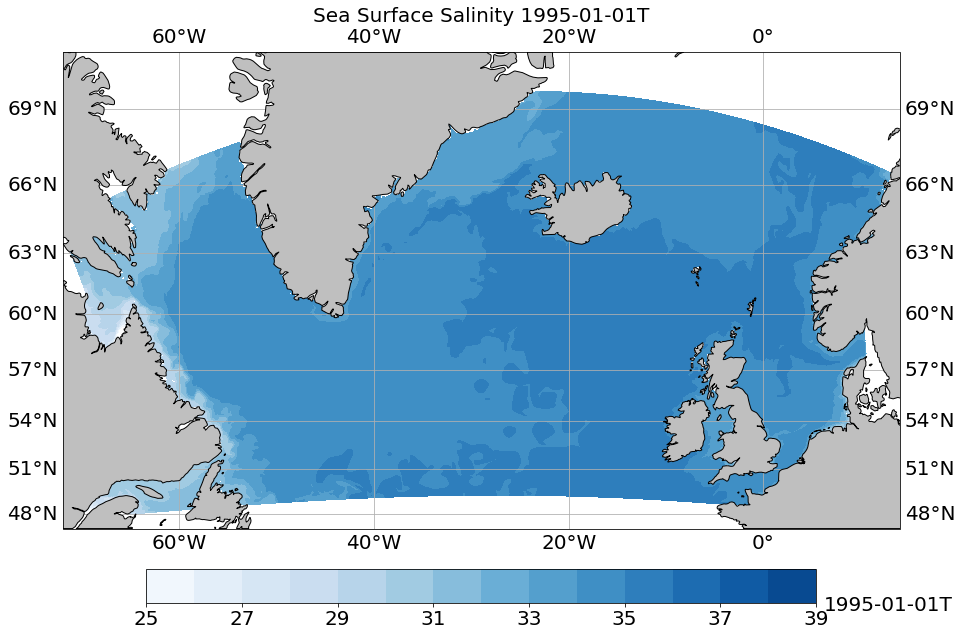

1 1995-01-02T12:00:00.000000000


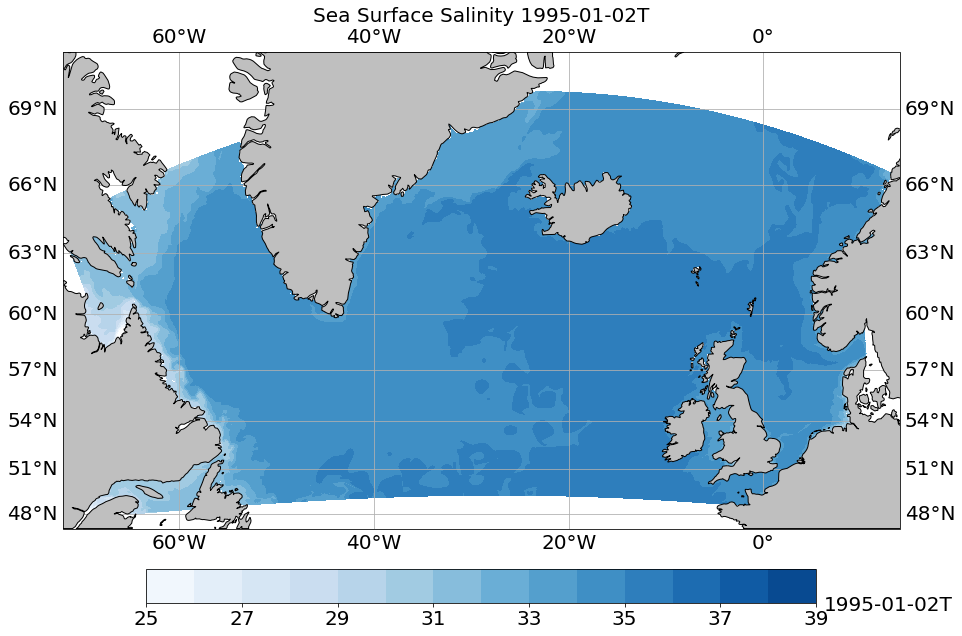

In [80]:
# Draw maps for 2 days
for tt in range(2):
    print(tt, tim[tt])
    plot_map(lon, lat, vosal[tt], "Sea Surface Salinity " +str(tim[tt])[0:11], "Blues",str(tim[tt])[0:11],"vosal", 25, 40, "0m")

In [24]:
# numpy.histogram(a, bins=10, range=None, density=None, weights=None), построение графиков с разными бинс (int or sequence of str defines number of equal width bins in a range, default is 10)

hist1, bins1 = np.histogram(vosal[:,333,500], bins=10, density=True)
hist2, bins2 = np.histogram(vosal[:,280,200], bins=20, density=True)
hist3, bins3 = np.histogram(vosal[:,52,620], bins=30, density=True)

In [25]:
print(bins1, hist1)

[31.344124 31.622158 31.900192 32.178226 32.45626  32.734295 33.01233
 33.290363 33.568398 33.84643  34.124466] [0.00985392 0.02956175 0.09853917 0.18722442 0.12810092 0.4631341
 0.67992027 0.89670645 1.06422303 0.03941567]


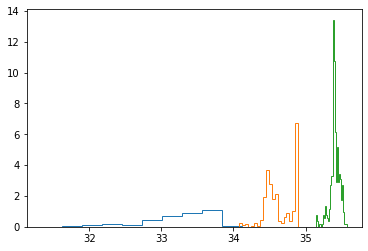

In [26]:
# A stepwise constant function as a line with bounding edges or a filled plot
plt.stairs(hist1, bins1)
plt.stairs(hist2, bins2)
plt.stairs(hist3, bins3)

In [27]:
# Return a copy of the array collapsed into one dimension
vosal1d = vosal.flatten()

In [39]:
# plt.stairs - рисуем ступенчатые графики

# e.g. matplotlib.pyplot.stairs(values, edges=None, *, orientation='vertical', baseline=0, fill=False, data=None, **kwargs)

# Parameters:
# values - The step heights.
# edges - The edge positions, with len(edges) == len(vals) + 1, between which the curve takes on vals values (границы значений)
# orientation - {'vertical', 'horizontal'}, the direction of the steps. 
# (Vertical means that values are along the y-axis, and edges are along the x-axis)
# baseline - нижнее значение, The bottom value of the bounding edges or when fill=True, position of lower edge. If fill is True or an array is passed to baseline, a closed path is drawn.
# fill - default: False, Whether the area under the step curve should be filled


# .flatten - возвращает одномерный массив
# temp1d = temp.flatten()
# в temp много всего, flatten преобразует это в одну строчку

In [29]:
hist2, bins2 = np.histogram(vosal1d[~np.isnan(vosal1d)], bins=np.arange(25,40,1), density=True)

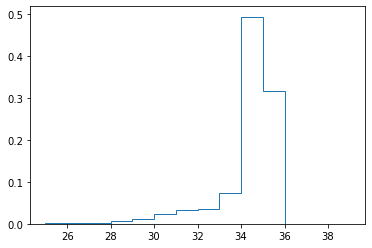

In [30]:
plt.stairs(hist2, bins2)

In [31]:
print(bins2, hist2)

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] [1.50679667e-03 2.01219631e-03 3.07161464e-03 5.94578226e-03
 1.23144097e-02 2.42696497e-02 3.24016495e-02 3.42080827e-02
 7.30372647e-02 4.94690370e-01 3.16529225e-01 1.29586920e-05
 0.00000000e+00 0.00000000e+00]
